# Matplotlib and Seaborn Exercise

<font color='Blue'>Motivation</font>: 画图不仅仅是为了给 leadership 好看和 story telling, 更重要的是it allows you to look at the data from different lens and different angle, 然后跟好的发现规律和潜在的问题，所谓的 data sense. 还记得当时花了几个小时不知道怎么画按 group 分类的 AUCROC 和 log loss metrics， 也不知道怎么加 error bar, 也不知道 hue 可以顺带做 groupby. 所以这一块一定要补.


需要练习的一些点:
- subplots
- multi-series plots (多个 series)
- multi-series overlay plots (多个 series 然后bar 是 stack on each other)
- distribution bucket plots 

<img src="matplotlib-vs-seaborn-2.png" alt="seaborn image" style="height: 220px; width:300px;"/>

-----------
先看 seaborn 吧，这个基本上就是 matplotlib 的一个 wrapper, 好处是可以帮你自动做一些aggregate
- [Seaborn displot | What is the displot vs distplot? How to make a Python Seaborn distribution plot](https://www.youtube.com/watch?v=4DA_dgc521o) (这个 Kimberly 系列可以说是 seaborn 讲的最好的系列了 !!)


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Seaborn Distplot 

(这个貌似比 distplot or histplot 好用)

In [3]:
cars = sns.load_dataset('mpg').dropna() #drop null cells

In [4]:
cars.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu


In [5]:
sns.set_style('white')

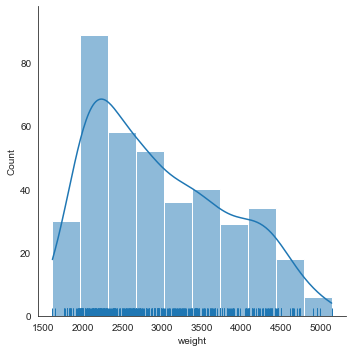

In [6]:
# x select the column we want to plot distribution on. 这里得是一个 continuous variable distribution
# 所以 非 distribution variable 的 是 countplot?? 
sns.displot(x='weight', 
             data=cars,
#              kind='kde'
             kde=True, # 这个是加了上面那条线      
             rug=True # 这个是加了底下的密度小白点
            )

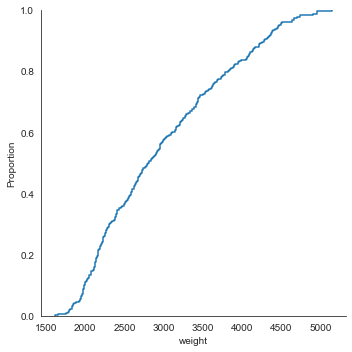

In [7]:
sns.displot(x='weight', # x select the column we want to plot distribution on
             data=cars,
             kind='ecdf' 
            )

# 这个就是 estimated cumulative distribution function             
# 就是加起来，然后纵轴是 percentage

## Bivariate 2D histogram 

kind of like a heat map

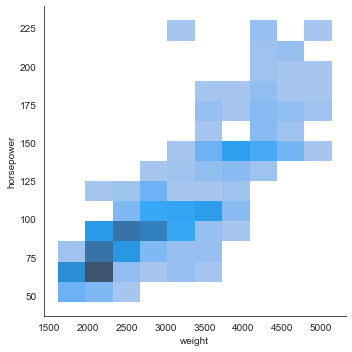

In [8]:
sns.displot(x='weight', y='horsepower', data=cars)

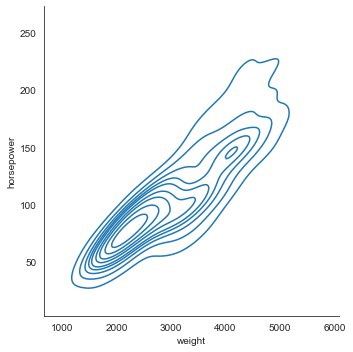

In [9]:
sns.displot(x='weight', y='horsepower', data=cars, kind = 'kde') # 还可以用 kde

You can also use FacetGrid

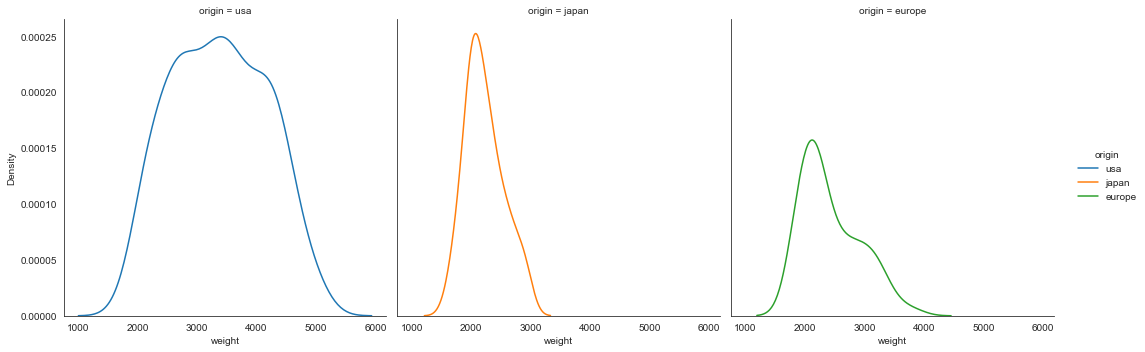

In [12]:
# 这样直接就 subplot 出来了，就是 hue 要和 col 对应，这样 FacetGrid 就出来了
sns.displot(x='weight', 
            hue='origin', 
            data=cars, 
            col='origin',
            kind = 'kde')

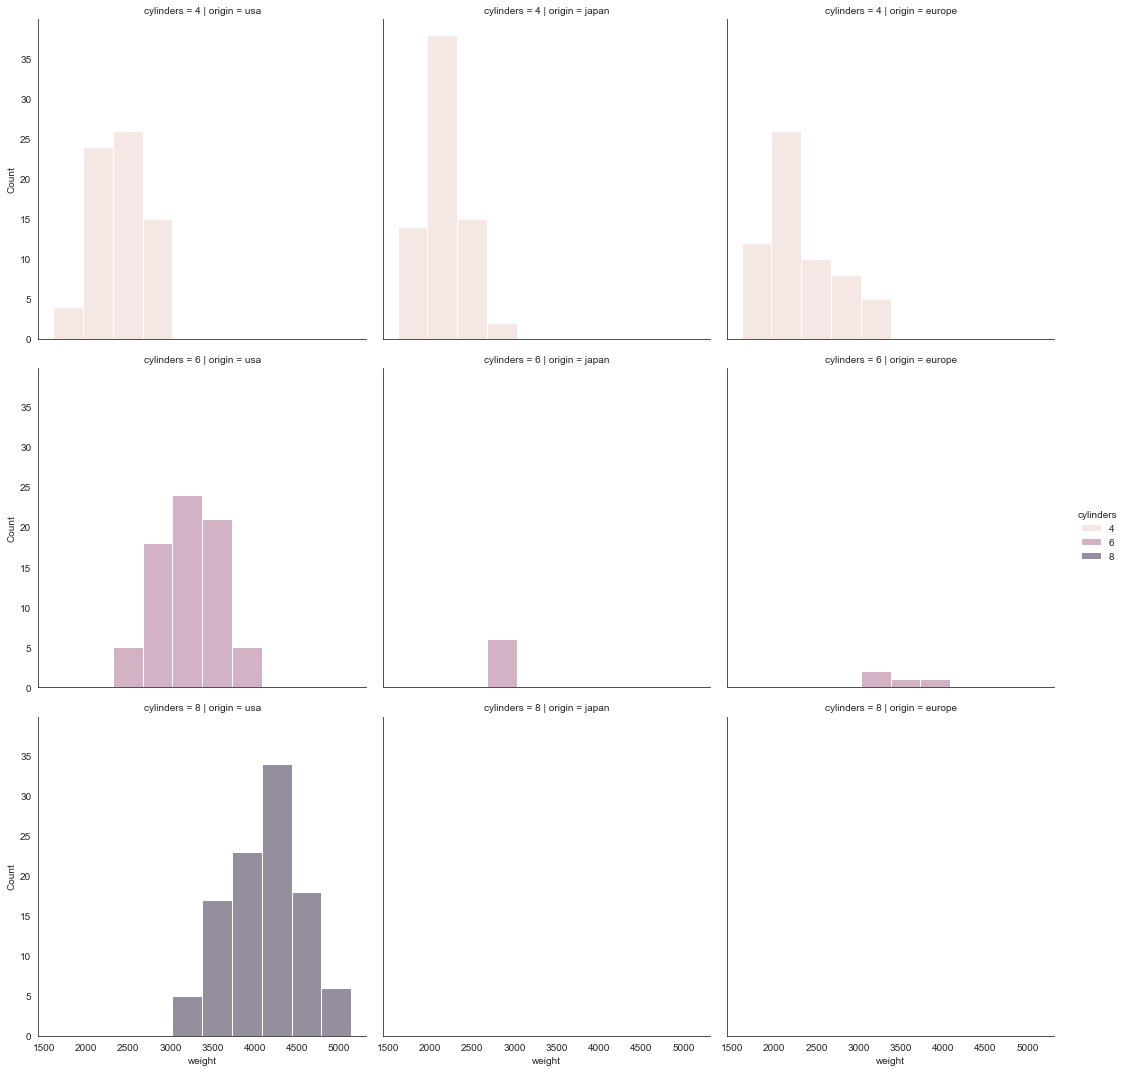

In [16]:
sns.displot(x='weight', 
            hue='cylinders', 
            data=cars[cars.cylinders.isin([4,6,8])], # 这样图看过去不会那么多
            col='origin',
            row='cylinders') # 居然还可以加 row 这样直接 两个 dimention 的 group by, 但是 hue 还是一个 group 

# 这个太骚了，但是我还是觉得直接 subplot 简单一些

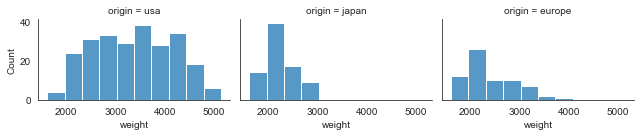

In [19]:
sns.displot(x='weight', 
            data=cars,
            col='origin',
            height=2, # 调高度
            aspect=1.5 # 调 图的长宽比       
           )

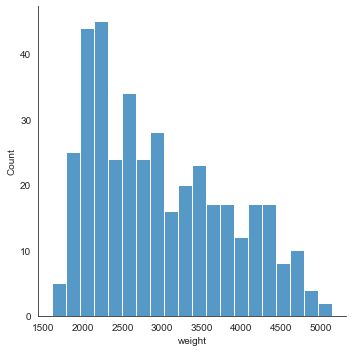

In [21]:
sns.displot(x='weight', 
            data=cars,
            bins=20   # 因为是 histplot 我们还可以选 bin 数量
           )

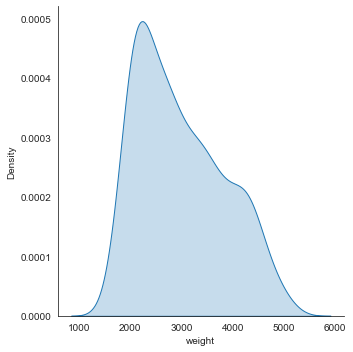

In [23]:
# 就是会根据你的 kind of plot 继承一些 options
sns.displot(x='weight', 
            data=cars,
            kind='kde',
            fill=True
           )

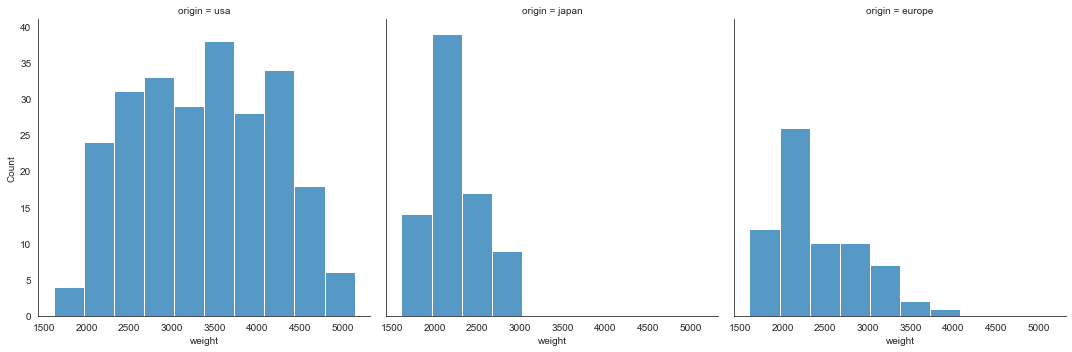

In [25]:
# You can also do FacetGrid Styling

g = sns.displot(x='weight', 
            data=cars,
            col='origin'
           )

In [26]:
# we can access this FacetGrid items
g.axes_dict.items()

dict_items([('usa', <AxesSubplot:title={'center':'origin = usa'}, xlabel='weight', ylabel='Count'>), ('japan', <AxesSubplot:title={'center':'origin = japan'}, xlabel='weight'>), ('europe', <AxesSubplot:title={'center':'origin = europe'}, xlabel='weight'>)])

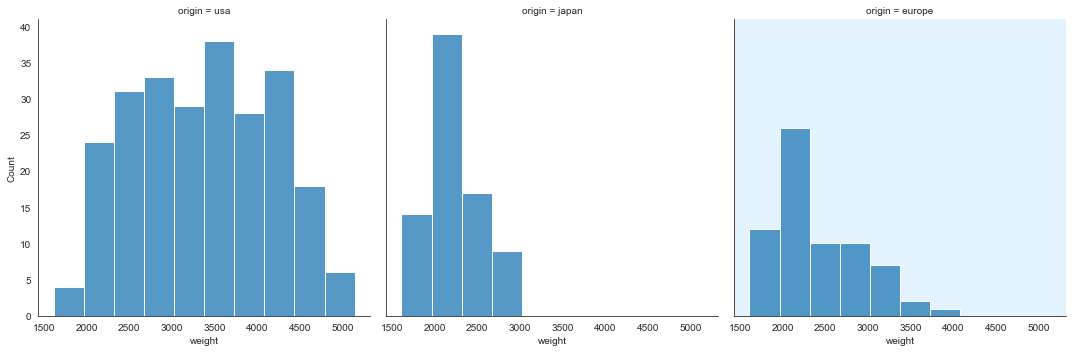

In [32]:
# and we can grab the subplot
for col_val, ax in g.axes_dict.items():
    if col_val == 'europe':
        ax.set_facecolor("#E2F2FF")

# 这下你看到颜色就不一样了
g.fig

## Categorical Variables: hue

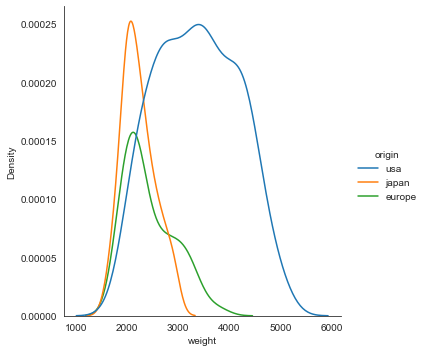

In [79]:
sns.displot(x='weight', data=cars, kind='kde', hue='origin')
# origin 这里指的是 car 的原产地那个 column
# 这里用 kde 而不是 bar 是因为 bar 会 overlap 不好看

In [80]:
# Let's see if we can plot subplot using using different group keys.. 

# Seaborn Count Plot

(exactly what she said: __histogram distribution plot for for categorical data!!__)

In [87]:
diamonds = sns.load_dataset('diamonds')
sns.set_style('darkgrid')

In [88]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
diamonds.shape

(53940, 10)

<AxesSubplot:xlabel='color', ylabel='count'>

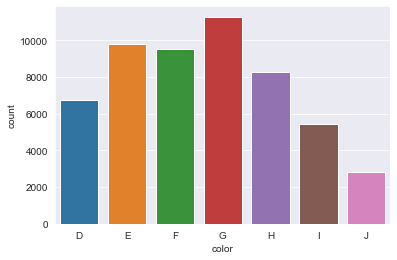

In [91]:
sns.countplot(x='color', data=diamonds)

In [93]:
# this is the same as 
diamonds.color.value_counts(sort=False)

D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: color, dtype: int64

__Question__: how to plot by percentage not by count?? 

__Answer__: 好像没有很简单的办法，我看到的都是 agg 之后用 bar plot.



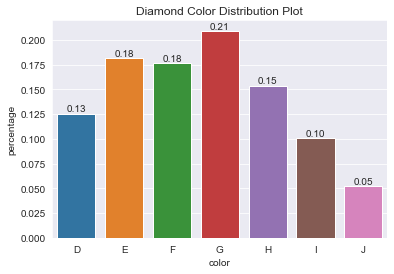

In [127]:
diamonds_by_color = diamonds.groupby('color') \
    .apply(lambda x: len(x['color']) / float(len(diamonds))) \
    .to_frame('percentage') \
    .reset_index()

ax = sns.barplot(x='color', y='percentage', data=diamonds_by_color)
ax.set_title('Diamond Color Distribution Plot')
for i in ax.containers: ax.bar_label(i,fmt='%.2f')
    

In [142]:
# Me trying out new syntax of agg with renaming columing in place

diamonds_agg_by_color = diamonds.groupby('color') \
        .agg(max_x = ('x', lambda i : np.max(i)),
             max_y = ('y', lambda i : np.max(i)),
            ) \
        .reset_index()

diamonds_agg_by_color

,color,max_x,max_y
0,D,9.42,9.34
1,E,9.26,31.80
2,F,9.24,9.13
3,G,9.44,9.37
4,H,10.00,58.90
5,I,10.14,10.10
6,J,10.74,10.54


In [95]:
# Question: count plot vs bar plot? 
# Answer: count plot just count, but bar plot you can also use mean or max not just count and you are also 
# getting confidence intervals

<AxesSubplot:xlabel='cut', ylabel='count'>

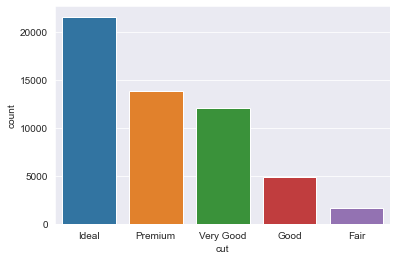

In [96]:
sns.countplot(x='cut', data=diamonds)

In [97]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [100]:
# seaborn is using the order of this category object's index to plot the bar ordre
print(diamonds.color.cat.categories)
print(diamonds.cut.cat.categories)

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')
Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')


<AxesSubplot:xlabel='color', ylabel='count'>

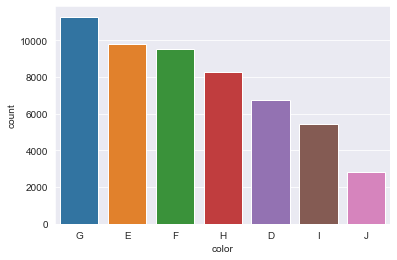

In [145]:
# we can also plot descending or ascending. 

sns.countplot(x='color', 
              order=diamonds.color.value_counts().index, # use  order=diamonds.color.value_counts().index[::-1] if you want ascending
               data=diamonds)



<AxesSubplot:xlabel='color', ylabel='count'>

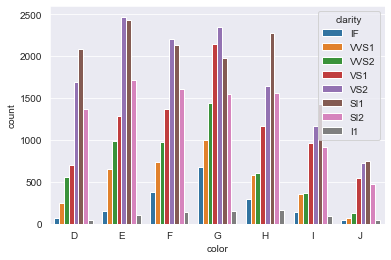

In [151]:
# we can use hue argument to do multi series
sns.countplot(x='color', 
              hue='clarity', # 这个就是 multi series group by key, 就是你要看每个 clarity 对应的 color dist (但是看的真的乱)
#               hue_order=['SI1', 'VS2'], # 这个就是你可以强行选只看两个 hue group key.
               data=diamonds)


<AxesSubplot:xlabel='color', ylabel='count'>

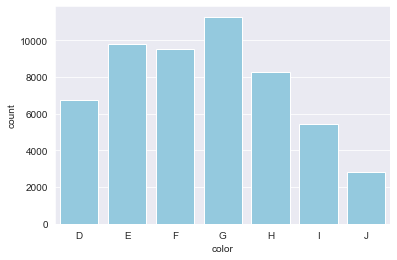

In [154]:
# 你也可以只用一个颜色来 plot count dist
sns.countplot(x='color', data=diamonds, color = 'skyblue')

# Seaborn Bar Plot

In [7]:
penguins = sns.load_dataset('penguins') # dataest comes with sns

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins.shape

(344, 7)

In [10]:
sns.set_style('darkgrid')

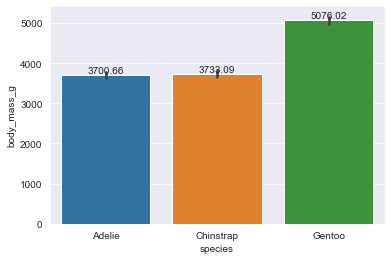

In [11]:
# data = <dataframe for plot>  and then x and y are the column name to use

# wait, so only 3 bars? that means it does the aggregation by "species" for you already based on your x-axis
# and y is already averaged with the error bar? wow!!
ax = sns.barplot(x='species',  # 这个其实是 categorical group key
                 y='body_mass_g',  # 这个是 numerical value for aggregation
                 data = penguins )

# 这个是一个很常用的加 data label 的方法
for i in ax.containers: ax.bar_label(i,)

In [12]:
# 她这里有讲， seaborn bar plot 就是会帮你 group by 好了!
# 你看，数字是差不多的
penguins.groupby('species').agg({'body_mass_g': 'mean'})

# penguins.groupby('species').body_mass_g.mean() # 这个还可以这样写，但是我觉得上面的写法更 general

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


## Horizontal Barplot

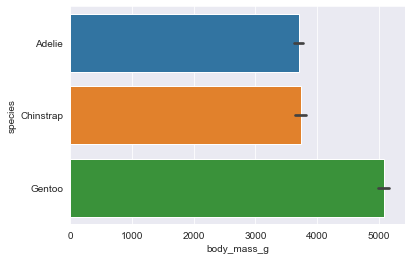

In [13]:
# 你还可以横着画， 直接 x, y 换一下就行， 然后 seaborn 会自己 detect 哪一个是 categorical variable， 然后用那个做 group key
ax = sns.barplot(x='body_mass_g',
                 y='species',
                 data = penguins )

____________
How does seaborn confidence interval work (aka. Interval Estimates)
- 她说用的是 bootstrap， 就是对这几个 key 会 random draw samples 然后 calculate mean 然后通过这些多个 mean 来算 CI (confidence interval)

<img src="seaborn_bar_plot_ci_estimate.png" alt="seaborn image" style="height: 220px; width:300px;"/>

In [14]:
# Let's see what we can do with confidence interval

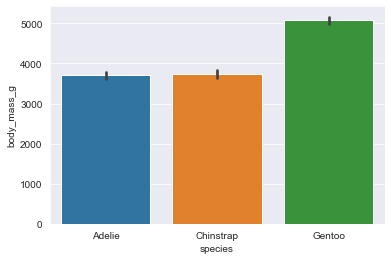

In [15]:
ax = sns.barplot(x='species',  # 这个其实是 categorical group key
                 y='body_mass_g',  # 这个是 numerical value for aggregation
                 ci=95, # 这个是你选你的 confidence interval, 如果不要 CI bar 可以写 None
                 data = penguins )

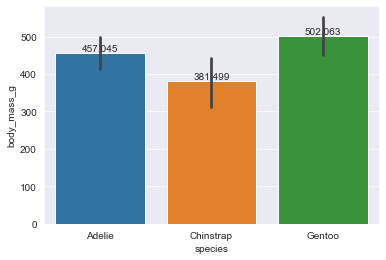

In [18]:
# 这里还可以选择用 不同的 estimator??
# 诶，这里怎么不是画 mean 了， 所以画的是 stdev 了

ax = sns.barplot(x='species',  # 这个其实是 categorical group key
                 y='body_mass_g',  # 这个是 numerical value for aggregation
                 estimator=np.std, 
                 data = penguins )

for i in ax.containers: ax.bar_label(i,)

In [17]:
# hmm. 跟上面不太一样？但是其实差不多
penguins.groupby('species').agg({'body_mass_g': np.std})

,body_mass_g
species,
Adelie,458.566126
Chinstrap,384.335081
Gentoo,504.116237


## Categorical Variables

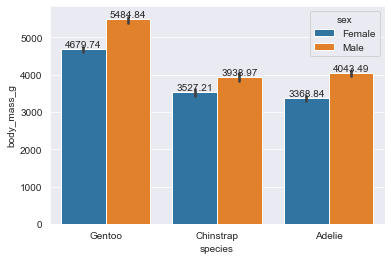

In [33]:
# how does seaborn handle 2 categorical variables/ 

# answer use hue!! (这样就会变成 multi-series, series 数取决于你的 group key 数)

ax = sns.barplot(x='species',  # 这个其实是 categorical group key
                 y='body_mass_g',  # 这个是 numerical value for aggregation
                 hue= 'sex', 
                 order=['Gentoo', 'Chinstrap', 'Adelie'], # 这里还可以自己调顺序
                 hue_order=['Female', 'Male'], # 同上
                 data = penguins)

for i in ax.containers: ax.bar_label(i,)
    
# 这里发现， x 是你的 group by key, 然后 hue 其实是你的 second group by key! 
# 也不许是categorical 的 

## Stacked Bar Plot

(Instructor 说这个seaborn不好弄， 最好还是用 pandas 自带的 stacked bar plot)


In [41]:
df = pd.DataFrame(
    {
        'a': np.random.randint(0,5,size=5),
        'b': np.random.randint(0,5,size=5),
        'c': np.random.randint(0,5,size=5)        
    }
)
df

,a,b,c
0,3,2,2
1,3,3,0
2,3,3,4
3,0,2,4
4,2,3,4


<AxesSubplot:>

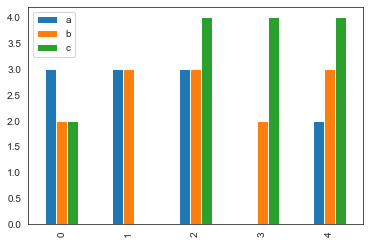

In [42]:
# 直接画，就是 multi-series 的，互相靠在一起的
df.plot(kind='bar')

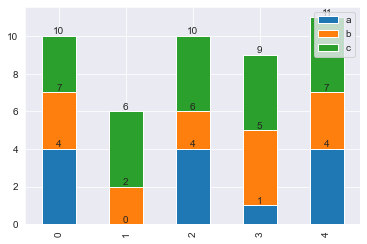

In [42]:
ax = df.plot(kind='bar', stacked=True)

for i in ax.containers: ax.bar_label(i,) # 还是同样的方法show number

#nice!! stack 就是好几个 column (series) stack 到一起

# Fig and Ax in MatplotLib

(let's try to understand this for subplot)

- [Explanation of fig, ax from plt.subplots() | Matplotlib](https://www.youtube.com/watch?v=Tqph7_qMujk) (this is a simple video to demonstrates, I'm sure there's more)


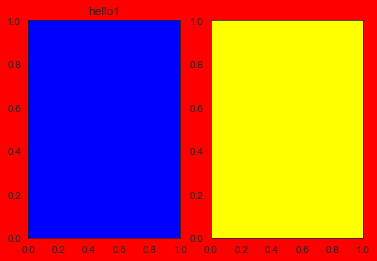

In [46]:
# 这个例子就可以看到 fig 和 ax1, ax2 的关系
# fig 是 Figure type 是你整个大图
# ax 是 Axes type 是你里面局部的小图 

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_facecolor('red')
ax1.set_facecolor('blue')
ax1.set_title('hello1')
ax2.set_facecolor('yellow')

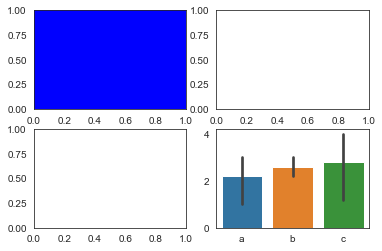

In [57]:
# 你还可以这样写

fig, axs = plt.subplots(2,2)
axs[0,0].set_facecolor('blue')

# 然后你要设置某个 ax 是某个 plot 也可以
axs[0,1] = sns.barplot(data=df) # 他这个也很聪明，直接就能知道我这个没有 unpivot 的 plot 的 x 和y 是什么